In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import pickle as p
from tensorflow.keras import layers, models
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [3]:
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=100)

In [4]:
def Upload_Dataset(Dataset_Path):
   
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
   
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            #print(j)
            for k in os.listdir(Path_train_Dataset+"/"+j):
                img=cv2.imread(Path_train_Dataset+"/"+j+"/"+k)
                Input_train_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    print('0 Entered ',j)
                    Output_train.append(int(0))
                elif(j == 'ewer'):
                    print('1 Entered ',j)
                    Output_train.append(int(1))
                elif(j == 'helicopter'):
                    print('2 Entered ',j)
                    Output_train.append(int(2))
                elif(j == 'scorpion'):
                    print('3 Entered ',j)
                    Output_train.append(int(3))
                else:
                    print('4 Entered ',j)
                    Output_train.append(int(4))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                img=cv2.imread(Path_test_Dataset+"/"+j+"/"+k)
                Input_test_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_test.append(int(0))
                elif(j == 'ewer'):
                    Output_test.append(int(1))
                elif(j == 'helicopter'):
                    Output_test.append(int(2))
                elif(j == 'scorpion'):
                    Output_test.append(int(3))
                else:
                    Output_test.append(int(4))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                img=cv2.imread(Path_val_Dataset+"/"+j+"/"+k)
                Input_val_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_val.append(int(0))
                elif(j == 'ewer'):
                    Output_val.append(int(1))
                elif(j == 'helicopter'):
                    Output_val.append(int(2))
                elif(j == 'scorpion'):
                    Output_val.append(int(3))
                else:
                    Output_val.append(int(4))
       
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train)
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val
#providing path of  Caltech-101 dataset
Dataset_Path = "/content/drive/MyDrive/DLA5/Group_1"

In [5]:
#calling Upload_Dataset function
trainInp, testInp,valInp, trainOut, testOut, valOut= Upload_Dataset(Dataset_Path)

0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
0 Entered  brain
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Entered  ewer
1 Ente

In [6]:
model = models.Sequential()
#First Layer
model.add(layers.Conv2D(8, (11, 11), strides=4,activation='relu', padding='valid',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3,), strides=2, padding='valid'))

#Second Layer
model.add(layers.Conv2D(16, (5, 5), strides=1,activation='relu',padding='valid', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3,), strides=2, padding='valid'))
#3 Layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', name='hiddenLayer'))
#4th layer
model.add(layers.Dense(5, activation='softmax', name='outputLayer'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 hiddenLayer (Dense)         (None, 128)               2

In [ ]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-6,name='Adam')

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=3,verbose=1)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x = trainInp, y = trainOut, batch_size = 32, epochs = 10000, verbose = "auto", callbacks=[es], validation_data=(valInp,  valOut), validation_batch_size=1)

Epoch 1/10000
8/8 [==============================] - 4s 339ms/step - loss: 114.7398 - accuracy: 0.2280 - val_loss: 4.7755 - val_accuracy: 0.1400
Epoch 2/10000
8/8 [==============================] - 3s 418ms/step - loss: 3.1218 - accuracy: 0.2880 - val_loss: 1.7574 - val_accuracy: 0.1800
Epoch 3/10000
8/8 [==============================] - 5s 612ms/step - loss: 1.7183 - accuracy: 0.3320 - val_loss: 1.6851 - val_accuracy: 0.3000
Epoch 4/10000
8/8 [==============================] - 3s 302ms/step - loss: 1.4916 - accuracy: 0.3520 - val_loss: 1.6857 - val_accuracy: 0.3000
Epoch 5/10000
8/8 [==============================] - 2s 299ms/step - loss: 1.3872 - accuracy: 0.3680 - val_loss: 1.5820 - val_accuracy: 0.3000
Epoch 6/10000
8/8 [==============================] - 2s 292ms/step - loss: 1.3373 - accuracy: 0.4000 - val_loss: 1.6039 - val_accuracy: 0.3400
Epoch 7/10000
8/8 [==============================] - 4s 514ms/step - loss: 1.2730 - accuracy: 0.4360 - val_loss: 1.6334 - val_accuracy: 0.26

In [ ]:
model.save('/content/drive/MyDrive/DLA5/a1.h5')
f=open('/content/drive/MyDrive/DLA4/Histae32.pckl','wb')
p.dump(history.history,f)
f.close()

In [ ]:

print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainInp,y=trainOut,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valInp, y=valOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testInp, y=testOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testInp, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)
print(pred)

'''3-3'''
#confusionMatrix=confusion_matrix(Output_test, pred)
confusionMatrix=confusion_matrix(testOut,pred)
#confusionMatrix=tf.math.confusion_matrix(Output_test, pred5)
print(confusionMatrix)



Evaluation of model on train data:
250/250 [==============================] - 1s 5ms/step - loss: 0.5081 - accuracy: 0.7960
['loss', 'accuracy']
[0.5081469416618347, 0.7960000038146973]

Evaluation of model on validation data:
50/50 [==============================] - 0s 4ms/step - loss: 2.2005 - accuracy: 0.5800
['loss', 'accuracy']
[2.20047926902771, 0.5799999833106995]

Evaluation of model on test data:
100/100 [==============================] - 0s 4ms/step - loss: 3.4599 - accuracy: 0.4500
['loss', 'accuracy']
[3.4599316120147705, 0.44999998807907104]

Predictions for test data:
100/100 [==============================] - 1s 6ms/step
[0 0 0 0 3 2 1 0 0 1 0 0 2 3 0 3 1 1 0 2 3 1 4 1 1 3 1 1 1 1 1 4 4 4 1 1 3
 4 2 0 3 4 2 3 4 3 3 3 3 3 3 0 2 2 2 3 3 4 3 2 0 2 3 3 1 4 2 0 3 4 3 3 4 4
 2 3 3 2 0 4 0 4 1 4 4 3 4 4 0 4 4 4 4 4 1 3 4 4 4 3]
[[10  4  3  3  0]
 [ 1 10  1  3  5]
 [ 1  0  5 11  3]
 [ 3  1  4  7  5]
 [ 2  2  0  3 13]]


In [ ]:
conv_layer_index = [1] #[0, 1]
outputs = [model.layers[i].output for i in conv_layer_index]
print(outputs)
New_Model1 = Model(inputs=model.inputs, outputs=outputs)
print(New_Model1.summary())

[<KerasTensor: shape=(None, 26, 26, 8) dtype=float32 (created by layer 'max_pooling2d_6')>]
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 conv2d_5 (Conv2D)           (None, 54, 54, 8)         2912      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 8)        0         
 2D)                                                             
                                                                 
Total params: 2,912
Trainable params: 2,912
Non-trainable params: 0
_________________________________________________________________
None


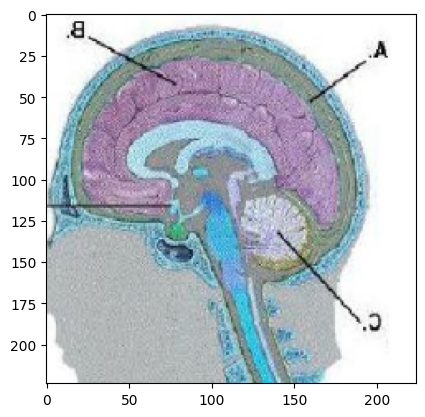

In [ ]:
img=trainInp[0]
plt.imshow(img)

In [ ]:
'''img = np.expand_dims(img, axis=0)
activations = New_Model1.predict(img)
maxAct=activations[0].max()
index_pos = np.where((activations[0][:,:,:]==maxAct))
max_index=[53,5,1]
# Find the index of the neuron with the highest activation
max_index = np.argmax(activations[0],axis=0)
mi=np.argmax(max_index,axis=0)
maxidx=np.argmax(mi,axis=0)
len(model.layers)
top_layer = model.layers[2]
weights=top_layer.get_weights()[0][0][:,:,0]
#len(weights)
plt.imshow(weights)

# Get the weights of the last convolutional layer
weights = top_layer.get_weights()[0]

# Get the patch of the image that maximally activates the chosen neuron
patch = img[17,2,12]

# Visualize the patch
plt.imshow(patch)
plt.title('Class ' + str(i))
plt.show()'''

"img = np.expand_dims(img, axis=0)\nactivations = New_Model1.predict(img)\nmaxAct=activations[0].max()\nindex_pos = np.where((activations[0][:,:,:]==maxAct))\nmax_index=[53,5,1]\n# Find the index of the neuron with the highest activation\nmax_index = np.argmax(activations[0],axis=0)\nmi=np.argmax(max_index,axis=0)\nmaxidx=np.argmax(mi,axis=0)\nlen(model.layers)\ntop_layer = model.layers[2]\nweights=top_layer.get_weights()[0][0][:,:,0]\n#len(weights)\nplt.imshow(weights)\n\n# Get the weights of the last convolutional layer\nweights = top_layer.get_weights()[0]\n\n# Get the patch of the image that maximally activates the chosen neuron\npatch = img[17,2,12]\n\n# Visualize the patch\nplt.imshow(patch)\nplt.title('Class ' + str(i))\nplt.show()"

In [ ]:
from keras.preprocessing import image
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def  preprocess_image(image):
    image = img_to_array(img)
    #x = np.expand_dims(image, axis=0)
    #x = cv2.resize(x, (224,224))
    #x= tf.convert_to_tensor(x)
    #preprocessed_input = tf.keras.applications.vgg19.preprocess_input(x)
    return x

In [ ]:
class_images=[]
num_classes=5
i=0
while(i<250):
    class_images.append(trainInp[i])
    i=i+50
class_idx=0
x = class_images[class_idx]
# Get the activations of the last convolutional layer for the image
#x = load_img(img_path, target_size=(224, 224))
#x = img_to_array(x)
x = np.expand_dims(x, axis=(0,1))
#x = preprocess_image(x)
img=x



In [ ]:

import tensorflow as tf
import numpy as np

# Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/DLA5/a2.h5')

# Choose an input image
img = np.random.rand(1,28, 28, 3).astype(np.float32)

# Get the output of the last convolutional layer
conv_output = model.layers[2].output

# Find the index of the maximally activated neuron in the layer
max_neuron_idx = tf.argmax(tf.reduce_max(conv_output, axis=(0, 1, 2)))

with tf.GradientTape() as tape:
    # Watch the input image to compute the gradients
    tape.watch(img)

    # Compute the output of the model
    output = model(img)

    # Compute the activation map
    cam = tf.reduce_sum(conv_output * tape.gradient(output, conv_output)[:, :, :, max_neuron_idx], axis=-1)

# Reshape the CAM to match the input image dimensions
cam = np.reshape(cam.numpy(), (28, 28))

# Find the indices of the maximum values in the CAM
max_idxs = tf.unravel_index(tf.argmax(tf.reshape(cam, [-1])).numpy(), cam.shape)

# Define the size of the receptive field
rf_size = (13, 13)

# Compute the center of the receptive field
rf_center = (max_idxs[0] + rf_size[0] // 2, max_idxs[1] + rf_size[1] // 2)

# Define the top-left and bottom-right corners of the receptive field
rf_tl = (rf_center[0] - rf_size[0] // 2, rf_center[1] - rf_size[1] // 2)
rf_br = (rf_center[0] + rf_size[0] // 2, rf_center[1] + rf_size[1] // 2)

print('Receptive field center:', rf_center)
print('Receptive field top-left corner:', rf_tl)
print('Receptive field bottom-right corner:', rf_br)

ValueError: ignored

In [ ]:
def conv_forward_naive(x, w, b, conv_param):
    """A naive implementation of the forward pass for a convolutional layer.

    The input consists of N data points, each with C channels, height H and
    width W. We convolve each input with F different filters, where each filter
    spans all C channels and has height HH and width WW.

    Input:
    - x: Input data of shape (N, C, H, W)
    - w: Filter weights of shape (F, C, HH, WW)
    - b: Biases, of shape (F,)
    - conv_param: A dictionary with the following keys:
      - 'stride': The number of pixels between adjacent receptive fields in the
        horizontal and vertical directions.
      - 'pad': The number of pixels that will be used to zero-pad the input.

    During padding, 'pad' zeros should be placed symmetrically (i.e equally on both sides)
    along the height and width axes of the input. Be careful not to modfiy the original
    input x directly.

    Returns a tuple of:
    - out: Output data, of shape (N, F, H', W') where H' and W' are given by
      H' = 1 + (H + 2 * pad - HH) / stride
      W' = 1 + (W + 2 * pad - WW) / stride
    - cache: (x, w, b, conv_param)
    """
    out = None
    ###########################################################################
    # TODO: Implement the convolutional forward pass.                         #
    # Hint: you can use the function np.pad for padding.                      #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    pass

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b, conv_param)
    return out, cache


def conv_backward_naive(dout, cache):
    """A naive implementation of the backward pass for a convolutional layer.

    Inputs:
    - dout: Upstream derivatives.
    - cache: A tuple of (x, w, b, conv_param) as in conv_forward_naive

    Returns a tuple of:
    - dx: Gradient with respect to x
    - dw: Gradient with respect to w
    - db: Gradient with respect to b
    """
    dx, dw, db = None, None, None
    ###########################################################################
    # TODO: Implement the convolutional backward pass.                        #
    ###########################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    pass

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db

In [ ]:
from imageio import imread
from PIL import Image

kitten = imread('/content/drive/MyDrive/DLA5/Group_1/train/ewer/image_0002.jpg')
puppy = imread('/content/drive/MyDrive/DLA5/Group_1/train/brain/image_0001.jpg')
# kitten is wide, and puppy is already square
d = kitten.shape[1] - kitten.shape[0]
kitten_cropped = kitten[:, d//2:-d//2, :]

img_size = 200   # Make this smaller if it runs too slow
resized_puppy = np.array(Image.fromarray(puppy).resize((img_size, img_size)))
resized_kitten = np.array(Image.fromarray(kitten).resize((img_size, img_size)))
x = np.zeros((2, 3, img_size, img_size))
x[0, :, :, :] = resized_puppy.transpose((2, 0, 1))
x[1, :, :, :] = resized_kitten.transpose((2, 0, 1))

# Set up a convolutional weights holding 2 filters, each 3x3
w = np.zeros((2, 3, 3, 3))

# The first filter converts the image to grayscale.
# Set up the red, green, and blue channels of the filter.
w[0, 0, :, :] = [[0, 0, 0], [0, 0.3, 0], [0, 0, 0]]
w[0, 1, :, :] = [[0, 0, 0], [0, 0.6, 0], [0, 0, 0]]
w[0, 2, :, :] = [[0, 0, 0], [0, 0.1, 0], [0, 0, 0]]

# Second filter detects horizontal edges in the blue channel.
w[1, 2, :, :] = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

# Vector of biases. We don't need any bias for the grayscale
# filter, but for the edge detection filter we want to add 128
# to each output so that nothing is negative.
b = np.array([0, 128])

# Compute the result of convolving each input in x with each filter in w,
# offsetting by b, and storing the results in out.
out, _ = conv_forward_naive(x, w, b, {'stride': 1, 'pad': 1})

def imshow_no_ax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')

# Show the original images and the results of the conv operation
plt.subplot(2, 3, 1)
imshow_no_ax(puppy, normalize=False)
plt.title('Original image')
plt.subplot(2, 3, 2)
imshow_no_ax(out[0, 0])
plt.title('Grayscale')
plt.subplot(2, 3, 3)
imshow_no_ax(out[0, 1])
plt.title('Edges')
plt.subplot(2, 3, 4)
imshow_no_ax(kitten_cropped, normalize=False)
plt.subplot(2, 3, 5)
imshow_no_ax(out[1, 0])
plt.subplot(2, 3, 6)
imshow_no_ax(out[1, 1])
plt.show()

<ipython-input-1-d096c5b86c62>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  kitten = imread('/content/drive/MyDrive/DLA5/Group_1/train/ewer/image_0002.jpg')
<ipython-input-1-d096c5b86c62>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  puppy = imread('/content/drive/MyDrive/DLA5/Group_1/train/brain/image_0001.jpg')


NameError: ignored

https://stackoverflow.com/questions/76121384/is-there-a-better-way-to-find-the-patch-of-image-which-makes-a-neuron-fire-for-a

In [ ]:
USE_BIAS = True

arch1 = keras.Sequential([
    keras.layers.Conv2D(8, 11, strides=4, padding='valid', activation='relu', input_shape=(224, 224, 3), use_bias=USE_BIAS),
    keras.layers.MaxPooling2D(3, strides=2),

    keras.layers.Conv2D(16, 5, strides=1, padding='valid', activation='relu', use_bias=USE_BIAS),
    keras.layers.MaxPooling2D(3, strides=2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', use_bias=USE_BIAS),
    keras.layers.Dense(5, activation='softmax', use_bias=USE_BIAS)
])


In [ ]:
def perception_calc(prev_size,current_params,neuron_coordinates,cutoff = False):#calculates the receptive field of the neurons in the current layer
    #prev_size is a tuple of size 2 , current_params is a tuple of size 2
    #prev_size is the size of the previous layer and current_params is the stride and kernel size of the current layer
    #TODO : remove `prev_size` as a param; prev_size is not needed?

    ans = set() #set of coordinates of neurons in the conv layer which are in the receptive field
    stride = current_params[0]#tuple of size 2
    kernel_size = current_params[1]#tuple of size 2
    x_max_ = prev_size[0]#redundant?
    y_max_ = prev_size[1]#redundant?
    for i in neuron_coordinates:#reverse calculation
        x = i[0]
        y = i[1]
        x_min = x*stride[0]
        x_max = x_min + kernel_size[0]
        y_min = y*stride[1]
        y_max = y_min + kernel_size[1]
        for i in range(x_min,x_max):
            for j in range(y_min,y_max):
                ans.add((i,j)) #redundant calculation TODO: optimise?
    return ans

In [ ]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#find the coordinates of the neuron which is maximally activated
#trace back to original image
#original image is rgb,so it has 3 channels , handle this carefully
#draw a rectangle around the region of interest
#for best arch
def find_max_activation(image,best_arch):
    layers = [layer.output for layer in best_arch.layers]
    activation_model = keras.models.model(inputs=best_arch.input, outputs=layers)
    f_map = activation_model.predict(image[0],verbose = 0)
    #find the index of last conv layer
    last_conv_index = 0
    for i in range(len(layers)):
        if 'conv' in layers[i].name:
            last_conv_index = i
    #find the value of the max activation neuron
    max_activation = np.max(f_map[last_conv_index][0])
    #find all the neurons which have the max activation value, put their indices in a list
    max_activation_indices = np.where(f_map[last_conv_index][0] == max_activation)
    #find the coordinates of the max activation neurons
    max_activation_coordinates = []
    for i in range(len(max_activation_indices[0])):
        max_activation_coordinates.append((max_activation_indices[0][i],max_activation_indices[1][i]))

    #find the receptive field of the max activation neuron
    square_coordinates = None
    #start from the last conv layer and go backwards
    n_coord = max_activation_coordinates
    for i in range(last_conv_index,0,-1):
        strides = best_arch.layers[i].get_config()['strides']
        try:
            kernel_size = best_arch.layers[i].get_config()['kernel_size']
        except:
            kernel_size = best_arch.layers[i].get_config()['pool_size']
        params = (strides,kernel_size)
        prev_size = f_map[i-1][0].shape

        n_coord = perception_calc(prev_size,params,n_coord)

        if i == 1:
            square_coordinates = n_coord
    #find the coordinates of the max activation neuron in the original image
    #the original image is of size 224x224
    #the image is rgb,so it has 3 channels
    image_coordinates = perception_calc((224,224),[(4,4),(11,11)],square_coordinates,cutoff = False)#as first layer is same for all CNNs (so hardcoded)
    #draw a rectangle around the region of interest
    sq_top_left = (min(image_coordinates)[0],min(image_coordinates)[1])
    sq_bottom_right = (max(image_coordinates)[0],max(image_coordinates)[1])
    image = image.numpy().squeeze()
    image = (image*255).astype('uint8')
    #draw rectangle
    cv2.rectangle(image,sq_top_left,sq_bottom_right,(255,255,255),2)

    #display image
    display(PIL.Image.fromarray(image, mode='RGB'))

In [ ]:
img= imread('/content/drive/MyDrive/DLA5/Group_1/train/ewer/image_0002.jpg')

<ipython-input-11-e8358340c01b>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img= imread('/content/drive/MyDrive/DLA5/Group_1/train/ewer/image_0002.jpg')


In [ ]:
img='/content/drive/MyDrive/DLA5/Group_1/train/helicopter/image_0002.jpg'
plt.imshow(img)

In [ ]:
a= find_max_activation(img, model)

AttributeError: ignored

In [ ]:
layer_names = [layer.name for layer in model.layers]
layer_names

['conv1',
 'MaxPool1',
 'conv2',
 'MaxPool2',
 'conv3',
 'MaxPool3',
 'flatten_1',
 'hiddenLayer',
 'outputLayer']

1/1 [==============================] - 0s 349ms/step


<ipython-input-41-91a891d65599>:32: RuntimeWarning: invalid value encountered in true_divide
  heatmap = cam / np.max(cam)


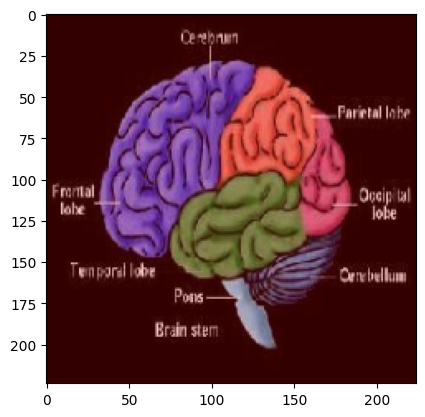

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/DLA5/Group_1/train/brain/image_0001.jpg')

# Preprocess the image for the model
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)

# Get the feature map output of the last convolutional layer
last_conv_layer = model.get_layer('conv3').output

# Create a new model that outputs the feature map and the predicted class
cam_model = keras.models.Model(inputs=model.input,
                               outputs=[last_conv_layer, model.output])

# Get the weights of the output layer
class_weights = model.get_weights()[-1]

# Get the feature map and the predicted class
features, prediction = cam_model.predict(img)
class_idx = np.argmax(prediction)

# Generate the class activation map
cam = np.zeros(features.shape[1:3], dtype=np.float32)
for i, w in enumerate(class_weights[:class_idx]):
    cam += w * features[0, :, :, i]
cam = cv2.resize(cam, (224, 224))
cam = np.maximum(cam, 0)
heatmap = cam / np.max(cam)

# Convert the heatmap to RGB
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

# Overlay the heatmap on the original image
img = np.squeeze(img, axis=0)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
output_image = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)

# Visualize the result
plt.imshow(output_image)
plt.show()

In [ ]:
num_neurons=5
layer_name='conv3'

# Get the corresponding patch from the input image
patch_size = model.get_layer(layer_name).output_shape[1:3]
# Identify the patch that maximally activates the neuron
activation_map = heatmap[i]
top_left = np.unravel_index(np.argmax(activation_map), activation_map.shape)
bottom_right = (top_left[0] + patch_size, top_left[1] + patch_size)

# Draw a rectangle around the patch
#cv2.rectangle(output_image, top_left[::-1], bottom_right[::-1], (0, 0, 255), 2)

# Visualize the result
plt.imshow(output_image)
plt.show()

IndexError: ignored

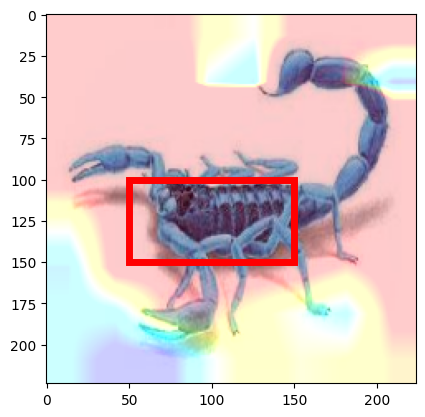

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Assume `patch` is the patch you want to draw a rectangle around
fig, ax = plt.subplots()
ax.imshow(output_image)  # Assume `image` is the input image
#rect = Rectangle((patch_x, patch_y), patch_width, patch_height, linewidth=1, edgecolor='r', facecolor='none')
rect = Rectangle((50, 100), 100, 50, linewidth=5, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

In [ ]:
from google.colab.patches import cv2_imshow

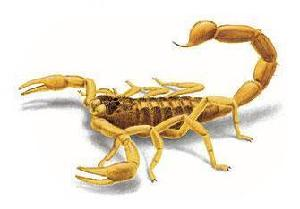

In [ ]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/DLA5/Group_1/train/scorpion/image_0005.jpg')
cv2_imshow(img)

1/1 [==============================] - 0s 196ms/step


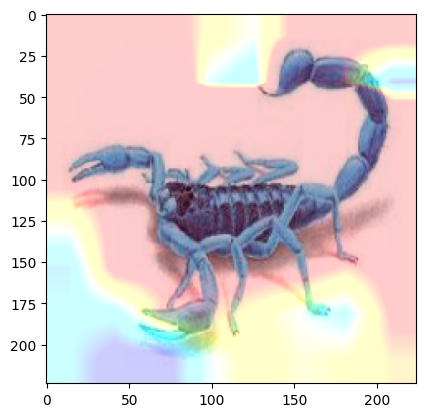

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/DLA5/Group_1/train/scorpion/image_0005.jpg')

# Preprocess the image for the model
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)

# Get the feature map output of the last convolutional layer
last_conv_layer = model.get_layer('conv3').output

# Create a new model that outputs the feature map and the predicted class
cam_model = keras.models.Model(inputs=model.input,
                               outputs=[last_conv_layer, model.output])

# Get the weights of the output layer
class_weights = model.get_weights()[-1]

# Get the feature map and the predicted class
features, prediction = cam_model.predict(img)
class_idx = np.argmax(prediction)

# Generate the class activation map
cam = np.zeros(features.shape[1:3], dtype=np.float32)
for i, w in enumerate(class_weights[:class_idx]):
    cam += w * features[0, :, :, i]
cam = cv2.resize(cam, (224, 224))
cam = np.maximum(cam, 0)
#print(cam)
heatmap = cam / np.max(cam)

# Convert the heatmap to RGB
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

# Overlay the heatmap on the original image
img = np.squeeze(img, axis=0)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
output_image = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)

# Visualize the result
plt.imshow(output_image)
plt.show()

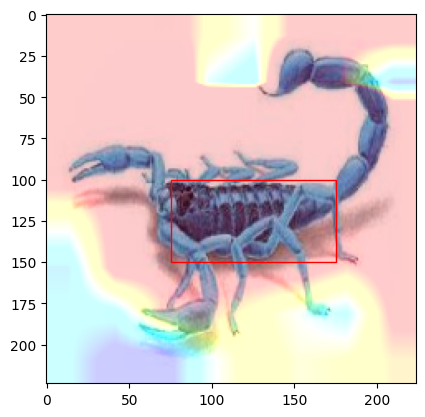

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Assume `patch` is the patch you want to draw a rectangle around
fig, ax = plt.subplots()
ax.imshow(output_image)  # Assume `image` is the input image
#rect = Rectangle((patch_x, patch_y), patch_width, patch_height, linewidth=1, edgecolor='r', facecolor='none')
rect = Rectangle((75, 100), 100, 50, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

1/1 [==============================] - 0s 253ms/step


<ipython-input-91-c66af9d36b35>:35: RuntimeWarning: invalid value encountered in true_divide
  cam /= np.max(cam)


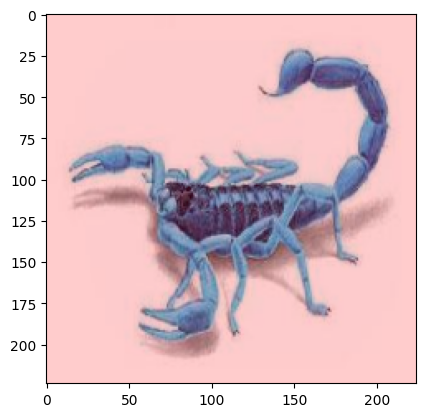

ValueError: ignored

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/DLA5/Group_1/train/scorpion/image_0005.jpg')

# Preprocess the image for the model
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)

# Get the feature map output of the last convolutional layer
last_conv_layer = model.get_layer('conv3').output

# Create a new model that outputs the feature map and the predicted class
cam_model = keras.models.Model(inputs=model.input,
                               outputs=[last_conv_layer, model.output])

# Get the weights of the output layer
class_weights = model.get_weights()[-1]

# Get the feature map and the predicted class
features, prediction = cam_model.predict(img)
class_idx = np.argmax(prediction)

# Generate the class activation map for each neuron
num_neurons=5
cams = []
for i in range(num_neurons):
    cam = np.zeros(features.shape[1:3], dtype=np.float32)
    for j, w in enumerate(class_weights[ :i]):
        cam += w * features[0, :, :, j]
    cam = cv2.resize(cam, (224, 224))
    cam = np.maximum(cam, 0)
    cam /= np.max(cam)
    cams.append(cam)

# Visualize the CAM for each neuron and identify the patches that maximally activate each one
layer_name='conv3'
for i in range(num_neurons):
    # Convert the CAM to RGB
    heatmap = cv2.applyColorMap(np.uint8(255 * cams[i]), cv2.COLORMAP_JET)

    # Overlay the heatmap on the original image
    img = np.squeeze(img, axis=0)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    output_image = cv2.addWeighted(img, 0.8, heatmap, 0.4, 0)
    # Get the corresponding patch from the input image
    patch_size = model.get_layer(layer_name).output_shape[1:3]
    # Identify the patch that maximally activates the neuron
    activation_map = cams[i]
    top_left = np.unravel_index(np.argmax(activation_map), activation_map.shape)
    bottom_right = (top_left[0] + patch_size, top_left[1] + patch_size)

    # Draw a rectangle around the patch
    #cv2.rectangle(output_image, top_left[::-1], bottom_right[::-1], (0, 0, 255), 2)

    # Visualize the result
    plt.imshow(output_image)
    plt.show()

In [ ]:
top_left


(0, 0)

In [ ]:
bottom_right

(array([8, 8]), array([8, 8]))

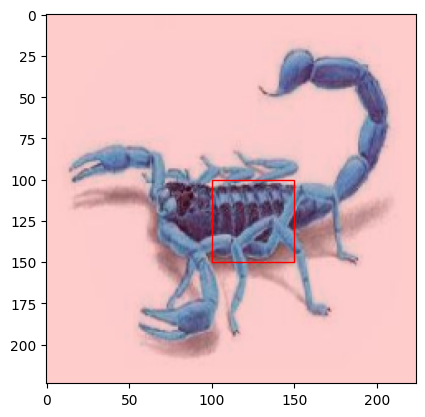

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Assume `patch` is the patch you want to draw a rectangle around
fig, ax = plt.subplots()
ax.imshow(output_image)  # Assume `image` is the input image
#rect = Rectangle((patch_x, patch_y), patch_width, patch_height, linewidth=1, edgecolor='r', facecolor='none')
rect = Rectangle((100, 100), 50, 50, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

https://learnopencv.com/cnn-receptive-field-computation-using-backprop/

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
from torch.hub import load_state_dict_from_url

from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt

from torchvision import transforms
from torchsummary import summary

In [ ]:
# Read ImageNet class id to name mapping
with open('/content/drive/MyDrive/DLA5/dla.txt') as f:
    labels = [line.strip() for line in f.readlines()]

# Read image
original_image = cv2.imread('/content/drive/MyDrive/DLA5/Group_1/test/brain/image_0015.jpg')

# Convert original image to RGB format
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Transform input image 
# 1. Convert to Tensor
# 2. Subtract mean
# 3. Divide by standard deviation

transform = transforms.Compose([            
              transforms.ToTensor(), #Convert image to tensor. 
              transforms.Normalize(                      
              mean=[0.485, 0.456, 0.406],   # Subtract mean 
              std=[0.229, 0.224, 0.225]     # Divide by standard deviation             
              )])

image = transform(image)
image = image.unsqueeze(0)

# Load modified resnet18 model with pretrained ImageNet weights
#model = FullyConvolutionmodelalResnet18(pretrained=True).eval()


with torch.no_grad():
    # Perform inference. 
    # Instead of a 1x1000 vector, we will get a 
    # 1x1000xnxm output ( i.e. a probabibility map 
    # of size n x m for each 1000 class, 
    # where n and m depend on the size of the image.)
    # create a tensor
    image = torch.randn(3, 4, 5)

    # get the size of the tensor as a torch.Size object
    size = image.size()

    # convert the size object to a list of dimensions
    dim_list = list(size)
    print(dim_list)
    preds = model.predict(image[0])
    preds = torch.softmax(preds, dim=1)
    
    print('Response map shape : ', preds.shape)

    # Find the class with the maximum score in the n x m output map
    pred, class_idx = torch.max(preds, dim=1)
    print(class_idx)


    row_max, row_idx = torch.max(pred, dim=1)
    col_max, col_idx = torch.max(row_max, dim=1)
    predicted_class = class_idx[0, row_idx[0, col_idx], col_idx]
    
    # Print top predicted class
    print('Predicted Class : ', labels[predicted_class], predicted_class)

    # Find the n x m score map for the predicted class
    score_map = preds[0, predicted_class, :, :].cpu().numpy()
    score_map = score_map[0]
    
    # Resize score map to the original image size
    score_map = cv2.resize(score_map, (original_image.shape[1], original_image.shape[0]))

    # Binarize score map
    _, score_map_for_contours = cv2.threshold(score_map, 0.25, 1, type=cv2.THRESH_BINARY)
    score_map_for_contours = score_map_for_contours.astype(np.uint8).copy()

    # Find the countour of the binary blob
    contours, _ = cv2.findContours(score_map_for_contours, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
    
    # Find bounding box around the object. 
    rect = cv2.boundingRect(contours[0])

    # Apply score map as a mask to original image
    score_map = score_map - np.min(score_map[:])
    score_map = score_map / np.max(score_map[:])

    score_map = cv2.cvtColor(score_map, cv2.COLOR_GRAY2BGR)
    masked_image = (original_image * score_map).astype(np.uint8)

    # Display bounding box
    cv2.rectangle(masked_image, rect[:2], (rect[0] + rect[2], rect[1] + rect[3]), (0, 0, 255), 2)
    
    # Display images
    cv2.imshow("Original Image", original_image)
    cv2.imshow("scaled_score_map", score_map)
    cv2.imshow("activations_and_bbox", masked_image)
    cv2.waitKey(0)

[3, 4, 5]


TypeError: ignored

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model
#model = tf.keras.models.load_model('my_model.h5')

# Choose an input image
img = np.random.rand(1, 224, 224, 3).astype(np.float32)

# Get the output of the last convolutional layer
conv_output = model.get_layer('conv3').output

print(conv_output)

conv_output_tensor=tf.cast(conv_output, tf.float32)

print(type(conv_output_tensor))

# Find the index of the maximally activated neuron in the layer
with tf.GradientTape() as tape:
    #conv_output_tensor = conv_output.tensor
    #conv_output_tensor = conv_output.numpy()
   
    tape.watch(conv_output_tensor)
    output = model(img)
    max_neuron_idx = tf.argmax(tf.reduce_max(conv_output_tensor, axis=(0, 1, 2)))

# Create a new model that outputs both the original output and the conv_output
cam_model = tf.keras.models.Model(inputs=model.inputs, outputs=[model.output, conv_output])

# Compute the output of the model and the conv_output for the chosen image
output, conv_out = cam_model(img)

# Compute the gradient of the output with respect to the conv_output
grads = tape.gradient(output[:, max_neuron_idx], conv_output)

# Compute the weights of the conv_output features based on the gradients
weights = tf.reduce_mean(grads, axis=(1, 2), keepdims=True)

# Compute the CAM for the chosen image
cam = tf.reduce_sum(weights * conv_out, axis=-1)

# Normalize the CAM
cam = tf.keras.activations.relu(cam)

# Resize the CAM to match the original image size
cam_resized = tf.image.resize(cam, size=(224, 224))

# Get the maximum pixel value of the CAM
max_val = tf.reduce_max(cam_resized)

# Convert the CAM to a numpy array and scale it to the range [0, 255]
cam_np = cam_resized.numpy()[0]
cam_np_scaled = (cam_np / max_val) * 255.0

# Find the indices of the maximum values in the CAM
max_idxs = np.where(cam_np == np.max(cam_np))

# Define the size of the receptive field
rf_size = (13, 13)

# Compute the center of the receptive field
rf_center = (max_idxs[0][0] + rf_size[0] // 2, max_idxs[1][0] + rf_size[1] // 2)

# Define the top-left and bottom-right corners of the receptive field
rf_tl = (rf_center[0] - rf_size[0] // 2, rf_center[1] - rf_size[1] // 2)
rf_br = (rf_center[0] + rf_size[0] // 2, rf_center[1] + rf_size[1] // 2)

# Plot the CAM and the patch in the image that causes the neuron to fire
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img[0])
axs[0].imshow(cam_np_scaled, cmap='jet', alpha=0.5)
axs[1].imshow(img[0, rf_tl[0]:rf_br[0], rf_tl[1]:rf_br[1]])
plt.show()

KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 32), dtype=tf.float32, name=None), name='conv3/Relu:0', description="created by layer 'conv3'")
<class 'keras.engine.keras_tensor.KerasTensor'>


ValueError: ignored

https://stackoverflow.com/questions/76121384/is-there-a-better-way-to-find-the-patch-of-image-which-makes-a-neuron-fire-for-a

In [7]:
USE_BIAS = True

arch1 = keras.Sequential([
    keras.layers.Conv2D(8, 11, strides=4, padding='valid', activation='relu', input_shape=(224, 224, 3), use_bias=USE_BIAS),
    keras.layers.MaxPooling2D(3, strides=2),

    keras.layers.Conv2D(16, 5, strides=1, padding='valid', activation='relu', use_bias=USE_BIAS),
    keras.layers.MaxPooling2D(3, strides=2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', use_bias=USE_BIAS),
    keras.layers.Dense(5, activation='softmax', use_bias=USE_BIAS)
])

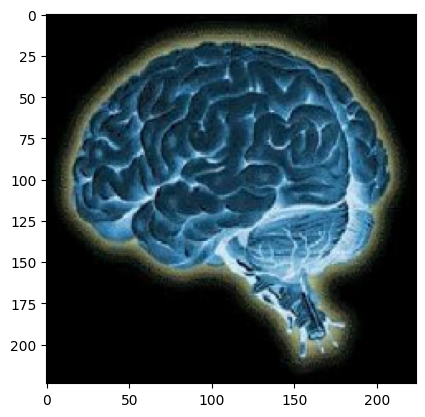

In [20]:
img=trainInp[45]

plt.imshow(img)

In [21]:
    image = img_to_array(img)
    x = np.expand_dims(image, axis=0)
    #x = cv2.resize(x, (224,224))
    x= tf.convert_to_tensor(x)
    #preprocessed_input = tf.keras.applications.vgg19.preprocess_input(x)

In [22]:
def perception_calc(prev_size,current_params,neuron_coordinates,cutoff = False):#calculates the receptive field of the neurons in the current layer
    #prev_size is a tuple of size 2 , current_params is a tuple of size 2
    #prev_size is the size of the previous layer and current_params is the stride and kernel size of the current layer
    #TODO : remove `prev_size` as a param; prev_size is not needed?

    ans = set() #set of coordinates of neurons in the conv layer which are in the receptive field
    stride = current_params[0]#tuple of size 2
    kernel_size = current_params[1]#tuple of size 2
    x_max_ = prev_size[0]#redundant?
    y_max_ = prev_size[1]#redundant?
    for i in neuron_coordinates:#reverse calculation
        x = i[0]
        y = i[1]
        x_min = x*stride[0]
        x_max = x_min + kernel_size[0]
        y_min = y*stride[1]
        y_max = y_min + kernel_size[1]
        for i in range(x_min,x_max):
            for j in range(y_min,y_max):
                ans.add((i,j)) #redundant calculation TODO: optimise?
    return ans

In [33]:
#find the coordinates of the neuron which is maximally activated
#trace back to original image
#original image is rgb,so it has 3 channels , handle this carefully
#draw a rectangle around the region of interest
#for best arch
def find_max_activation(image,best_arch):
    layers = [layer.output for layer in best_arch.layers]
    activation_model = keras.models.Model(inputs=best_arch.input, outputs=layers)
    f_map = activation_model.predict(image)
    #find the index of last conv layer
    last_conv_index = 0
    for i in range(len(layers)):
        if 'conv' in layers[i].name:
            last_conv_index = i
    #find the value of the max activation neuron
    max_activation = np.max(f_map[last_conv_index][0])
    #find all the neurons which have the max activation value, put their indices in a list
    max_activation_indices = np.where(f_map[last_conv_index][0] == max_activation)
    #find the coordinates of the max activation neurons
    max_activation_coordinates = []
    for i in range(len(max_activation_indices[0])):
        max_activation_coordinates.append((max_activation_indices[0][i],max_activation_indices[1][i]))

    #find the receptive field of the max activation neuron
    square_coordinates = None
    #start from the last conv layer and go backwards
    n_coord = max_activation_coordinates
    for i in range(last_conv_index,0,-1):
        strides = best_arch.layers[i].get_config()['strides']
        try:
            kernel_size = best_arch.layers[i].get_config()['kernel_size']
        except:
            kernel_size = best_arch.layers[i].get_config()['pool_size']
        params = (strides,kernel_size)
        prev_size = f_map[i-1][0].shape

        n_coord = perception_calc(prev_size,params,n_coord)

        if i == 1:
            square_coordinates = n_coord
    #find the coordinates of the max activation neuron in the original image
    #the original image is of size 224x224
    #the image is rgb,so it has 3 channels
    image_coordinates = perception_calc((224,224),[(4,4),(11,11)],square_coordinates,cutoff = False)#as first layer is same for all CNNs (so hardcoded)
    #draw a rectangle around the region of interest
    sq_top_left = (min(image_coordinates)[0],min(image_coordinates)[1])
    print(sq_top_left)
    sq_bottom_right = (max(image_coordinates)[0],max(image_coordinates)[1])
    print(sq_bottom_right)
    image = image.numpy().squeeze()
    image = (image*255).astype('uint8')
    #draw rectangle
    cv2.rectangle(image,sq_top_left,sq_bottom_right,(255,255,255),2)

    #display image
    display(PIL.Image.fromarray(image, mode='RGB'))

In [34]:
img.shape

(224, 224, 3)

In [35]:
import PIL.Image

1/1 [==============================] - 0s 94ms/step
(112, 88)
(162, 138)


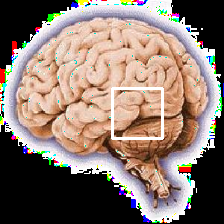

In [36]:
a= find_max_activation(x, model)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/DLA5/a2.h5')

# Get the target layer
layer_name = 'conv3'
layer = model.get_layer(layer_name)

# Compute the receptive field
receptive_field = 1
for l in model.layers:
    if l == layer:
        break
    if 'conv' in l.name:
        receptive_field = (receptive_field - 1) * l.strides[0] + l.kernel_size[0]

print(f'The receptive field of layer {layer_name} is {receptive_field}')


The receptive field of layer conv3 is 15
